https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough <br/>
https://psb.stanford.edu/psb-online/proceedings/psb18/olson.pdf

# <font color="#2086BA">1. Importing packages and Data</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
from collections import OrderedDict

pd.options.display.max_columns = 150
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'
%matplotlib inline

In [2]:
folderPath = "D:/Rep/MyLearning/competitions/kaggle/CostoRiconHVP";

In [3]:
fileName = "train.csv"
df_train = pd.read_csv(os.path.join(folderPath,fileName))

In [4]:
fileName = "test.csv"
df_test = pd.read_csv(os.path.join(folderPath,fileName))

In [5]:
data = pd.concat([df_train,df_test],sort=False)

In [6]:
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33413 entries, 0 to 23855
Columns: 143 entries, Id to Target
dtypes: float64(9), int64(129), object(5)
memory usage: 36.7+ MB


In [8]:
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# <font color="#2086BA">2. Data Cleaning and Missing Value Treatment</font>

### <font color="#135589">Treating columns with object dtype</font> 

In [9]:
datatypes = data.dtypes.reset_index()
datatypes.columns = ["Column Name", "Column Type"]
print(datatypes[datatypes['Column Type']=='object'])
del(datatypes)

    Column Name Column Type
0            Id      object
95      idhogar      object
100  dependency      object
101      edjefe      object
102      edjefa      object


In [10]:
mapping = {'yes':1,"no":0}
data['dependency'] = data['dependency'].replace(mapping).astype(np.float32)
data['edjefa'] = data['edjefa'].replace(mapping).astype(np.float32)
data['edjefe'] = data['edjefe'].replace(mapping).astype(np.float32)

df_train['dependency'] = df_train['dependency'].replace(mapping).astype(np.float32)
df_train['edjefa'] = df_train['edjefa'].replace(mapping).astype(np.float32)
df_train['edjefe'] = df_train['edjefe'].replace(mapping).astype(np.float32)

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


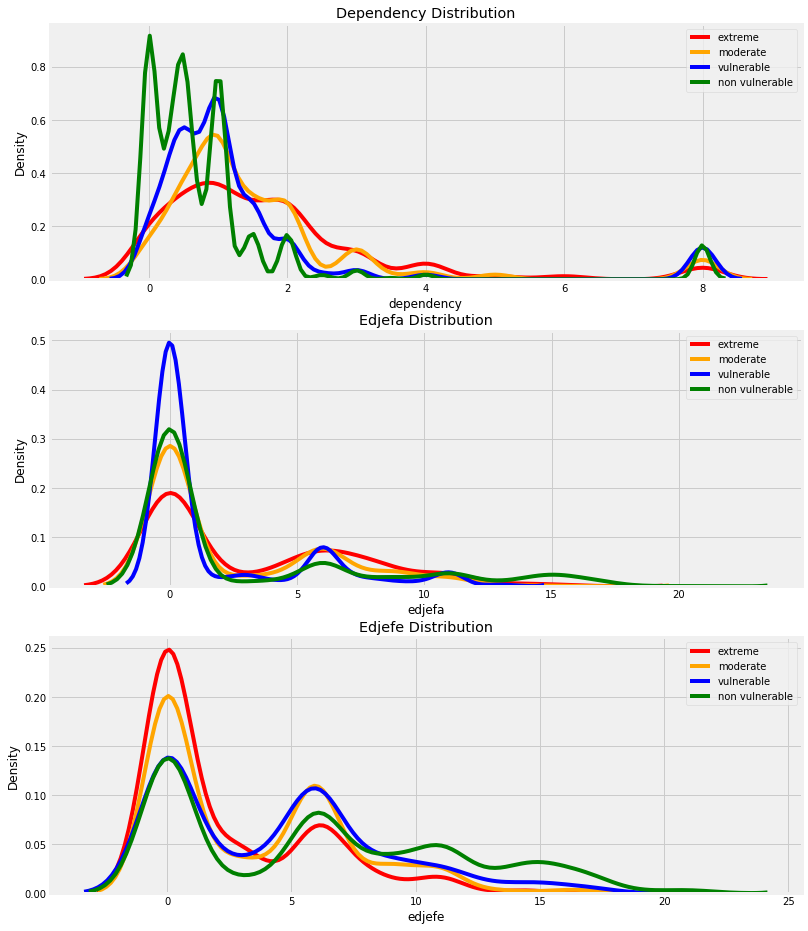

In [11]:
fig = plt.figure(figsize=(12,16))
for i,col in enumerate(['dependency','edjefa','edjefe']):
    ax = plt.subplot(3,1,i+1)
    for poverty_level,color in colors.items():
        sns.kdeplot(df_train.loc[df_train['Target']==poverty_level,col].dropna(),ax=ax,color=color,label=poverty_mapping[poverty_level])
        plt.title("{0} Distribution".format(col.capitalize()));
        plt.xlabel(col);
        plt.ylabel('Density')     
#plt.subplots_adjust(top = 2)
plt.show()

### <font color="#135589">Missing Value Treatment</font> 

In [12]:
# Number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})
missing['percent'] = missing['total'] / len(data)
missing = missing[missing['total']>0]
missing.sort_values('percent', ascending = False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
meaneduc,36,0.001077
SQBmeaned,36,0.001077


###### <font color="orange">1. v18q1 (Tablets owned by family)</font>

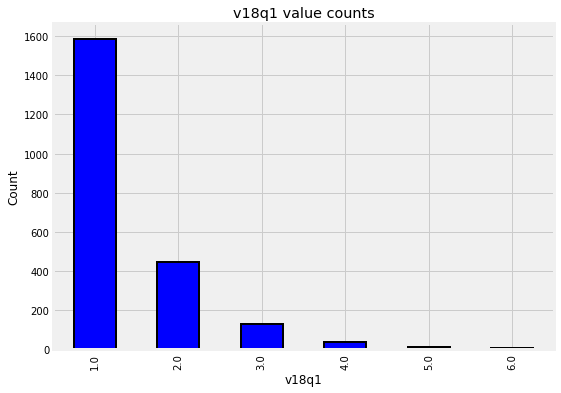

In [16]:
plot_value_counts(df_train,'v18q1')

In [17]:
tabletscount = df_train.groupby('idhogar').agg({'v18q1':'first','v18q':'sum'}).reset_index()
matching = len(tabletscount[(tabletscount['v18q']==0) & tabletscount['v18q1'].isnull()]) == len(tabletscount[(tabletscount['v18q']==0)])
print(f'The length of v18q1 counts with null values matching with length of v18q totaled to 0 is : {matching}')
del(tabletscount)
del(matching)

print('Above analysis proves that the null values in v18q1 represents 0')

The length of v18q1 counts with null values matching with length of v18q totaled to 0 is : True
Above analysis proves that the null values in v18q1 represents 0


In [18]:
df_train['v18q1'].fillna(0,inplace=True)
data['v18q1'].fillna(0,inplace=True)

##### <font color="orange">2. v2a1 Monthly rent payment</font>

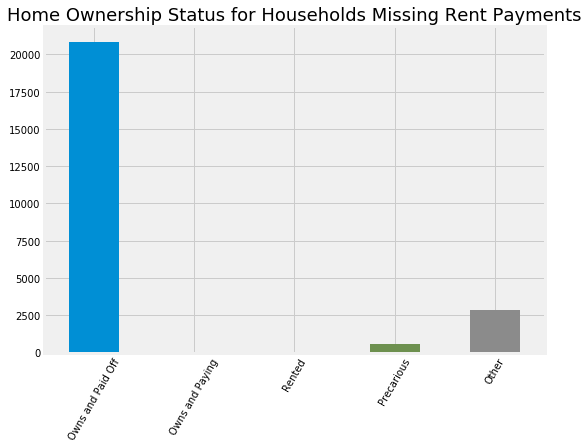

From above graph it is clear that the individuals who own there house have missing rent details


In [19]:
ownershipcols = [x for x in data.columns if x.startswith('tipo')]
data.loc[data['v2a1'].isnull(),ownershipcols].sum().plot.bar(figsize=(8,6))
plt.xticks([0, 1, 2, 3, 4], ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);
plt.show()
print('From above graph it is clear that the individuals who own there house have missing rent details')

In [20]:
data.loc[(data['v2a1'].isnull()) & (data['tipovivi1'] == 1),'v2a1'] = 0
df_train.loc[(df_train['v2a1'].isnull()) & (df_train['tipovivi1'] == 1),'v2a1'] = 0
data['v2a1-missing'] = data['v2a1'].isnull()
df_train['v2a1-missing'] = df_train['v2a1'].isnull()
data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

##### <font color="orange">3. rez_esc Years behind in school</font>

In [21]:
data.loc[data['rez_esc'].notnull(),'age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

The maximum age where value is not null is 17 and min value is 7. So we can assume that individuals whose age is > 17 or lower than 7 should have years behind in school set to 0.

In [22]:
data.loc[(data['rez_esc'].isnull()) & ((data['age']>19) | data['age']<7),'rez_esc'] = 0
df_train.loc[(df_train['rez_esc'].isnull()) & ((df_train['age']>19) | df_train['age']<7),'rez_esc'] = 0

In [23]:
data.loc[data['rez_esc'].isnull(),'rez_esc-missing'] = True
df_train.loc[df_train['rez_esc'].isnull(),'rez_esc-missing'] = True

In [24]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5
df_train.loc[df_train['rez_esc'] > 5, 'rez_esc'] = 5

In [25]:
data['rez_esc-missing'].value_counts()

Series([], Name: rez_esc-missing, dtype: int64)

### <font color="#135589">Label Correction</font> 

In this dataset individuals of same household are assigned to different poverty levels. It is being told that the head of the houehold should be considered as the true poverty level. But again there are few households where there is not head of household.

In [26]:
all_equal = df_train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)
not_equal = all_equal[all_equal!=True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [27]:
household_heads = df_train.groupby('idhogar')['parentesco1'].sum()
households_no_head = df_train.loc[df_train['idhogar'].isin(household_heads[household_heads==0].index),:]
print('There are {0} households without a head'.format(len(households_no_head)))
households_no_head_Equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x : x.nunique()==1)
print('There are {0} households with no head and having Target discrepancies'.format(sum(households_no_head_Equal==False)))

There are 23 households without a head
There are 0 households with no head and having Target discrepancies


In [28]:
type(df_train[(df_train['idhogar']=='0172ab1d9') & (df_train['parentesco1']==1)]["Target"])

pandas.core.series.Series

In [29]:
for household in not_equal.index:
    true_target = int(df_train.loc[(df_train['idhogar']==household) & (df_train['parentesco1']==1),"Target"])
    df_train.loc[(df_train['idhogar']==household),"Target"] = true_target
    data.loc[(data['idhogar']==household),"Target"] = true_target
    
all_equal = df_train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)
not_equal = all_equal[all_equal == False]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


### <font color="#135589">Label Exploration</font> 

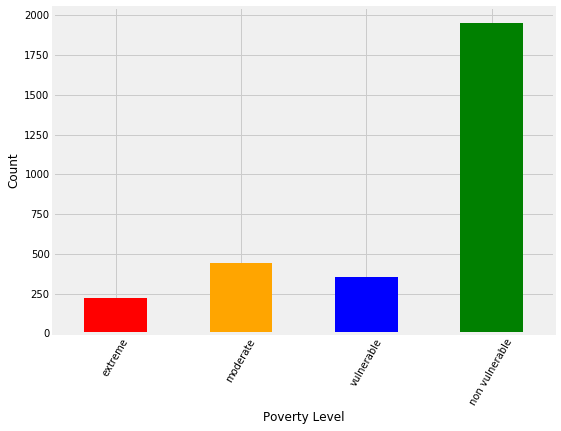

In [30]:
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1']==1),['Target','idhogar']]
label_counts = train_labels['Target'].value_counts().sort_index()
label_counts.plot.bar(figsize=(8,6),color=colors.values())
plt.xlabel('Poverty Level');
plt.ylabel('Count');
plt.xticks([x-1 for x in poverty_mapping.keys()],list(poverty_mapping.values()),rotation = 60)
plt.show()

# <font color="#2086BA">3. Feature Engineering</font>
<strong>Define Variable Categories</strong><br/>
There are several different categories of variables:

Individual Variables: these are characteristics of each individual rather than the household<br/>
    ->Boolean: Yes or No (0 or 1)<br/>
    ->Ordered Discrete: Integers with an ordering<br/>
Household variables<br/>
    ->Boolean: Yes or No<br/>
    ->Ordered Discrete: Integers with an ordering<br/>
    ->Continuous numeric<br/>
Squared Variables: derived from squaring variables in the data<br/>
Id variables: identifies the data and should not be used as features<br/>

In [31]:
id_ = ['Id', 'idhogar', 'Target']

In [32]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']
ind_ordered = ['rez_esc', 'escolari', 'age']

In [33]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']
hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']
hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [34]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [35]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

In [36]:
from collections import Counter
print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


#### <font color="orange">Squared variables</font> 
These variables would have made sense in Linear models but we'll be using complex models so no need to use these

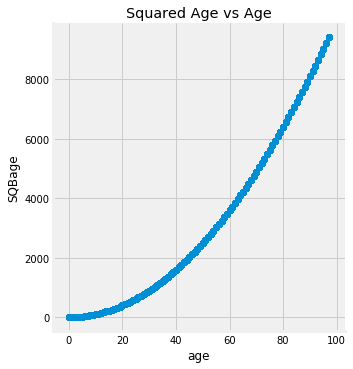

In [40]:
sns.lmplot('age','SQBage',data=data,fit_reg=False)
plt.title('Squared Age vs Age')
plt.show()

In [41]:
data = data.drop(columns=sqr_)
df_train = df_train.drop(columns=sqr_)

In [44]:
data.shape

(33413, 136)

### <font color="#135589">Household Level variables</font>

In [46]:
heads = data.loc[data['parentesco1']==1,:]
heads = heads[id_+hh_bool+hh_cont+hh_ordered]
heads.shape

(10307, 99)

##### <font color="orange">Removing Redundant variables</font>

In [49]:
corr_matrix = heads.corr()

In [59]:
np.triu([[1,2,3,9],[4,5,6,9],[7,8,9,9],[10,11,12,9]], 2)

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [70]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [col for col in upper.columns if any(abs(upper[col])>0.95)]
to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [77]:
corr_matrix.loc[corr_matrix['hogar_total'].abs()>0.9,corr_matrix['hogar_total'].abs()>0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


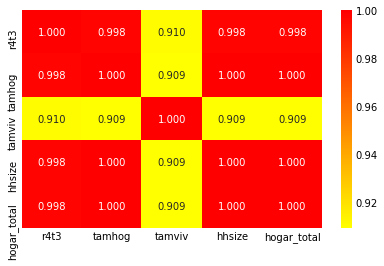

In [92]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9,corr_matrix['tamhog'].abs()>0.9],annot=True,cmap=plt.cm.autumn_r, fmt='.3f')

from above as hhsize has perfect correlation with tamhog and hogar total and also hhsize has has nearly perfect correlation with r4t3 and hogar total, <strong>so removing these three colums tamhog, hogar_total and r4t3<strong>

In [93]:
heads = heads.drop(columns=['tamhog','hogar_total','r4t3'])
data = data.drop(columns=['tamhog','hogar_total','r4t3'])
df_train = df_train.drop(columns=['tamhog','hogar_total','r4t3'])

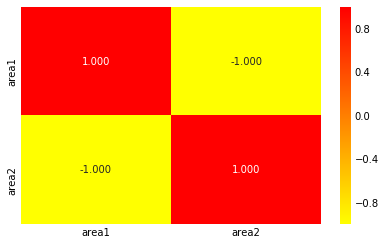

In [95]:
#checking of correlation of area1
sns.heatmap(corr_matrix.loc[corr_matrix['area1'].abs()>0.9,corr_matrix['area1'].abs()>0.9],annot=True,cmap=plt.cm.autumn_r, fmt='.3f')

In [96]:
heads = heads.drop(columns=['area2'])
data = data.drop(columns=['area2'])
df_train = df_train.drop(columns=['area2'])

In [ ]:
#checking for coopele (type of electricity service)
#first converting into ordinal variable
elec = []

# Assign values
for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)
        
# Record the new variable and missing flag
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

In [ ]:
#Remove the electricity columns
heads = heads.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])

# <font color="#2086BA">4. Model Selection</font> 

# <font color="#2086BA">5. Model Optimization</font> 

# <font color="#2086BA">6. Implementation</font>

# <font color="#2086BA">7. Investigating Predictions</font> 

# <font color="#2086BA">8. Trying New techniques</font> 

# <font color="#2086BA">Utilities</font>

In [15]:
def plot_value_counts(df,col,heads_only = False):
    '''
    This funtions will be used to plot bar graph
    for value counts of the columns
    '''
    if heads_only:
        df = df.loc[df['parentesco1']==1,:]
        
    plt.figure(figsize=(8,6))
    df[col].value_counts().sort_index().plot.bar(color='blue',edgecolor='k',linewidth=2)
    plt.xlabel(col);plt.title("{0} value counts".format(col));plt.ylabel('Count')
    plt.show()